In [1]:
import sys
import time
sys.path.insert(0, '/home/anish/AutoNN')

In [2]:
from AutoNN.preprocessing import data_cleaning
from AutoNN.preprocessing import encoding_v2 as enc
from AutoNN.main import AutoNN
import dask.dataframe as dd
from AutoNN.networkbuilding import final
import numpy as np
import pandas as pd



░█▀▀█ █░░█ ▀▀█▀▀ █▀▀█ ▒█▄░▒█ ▒█▄░▒█ 
▒█▄▄█ █░░█ ░░█░░ █░░█ ▒█▒█▒█ ▒█▒█▒█ 
▒█░▒█ ░▀▀▀ ░░▀░░ ▀▀▀▀ ▒█░░▀█ ▒█░░▀█

An AutoML framework by
Anish Konar, Arjun Ghosh, Rajarshi Banerjee, Sagnik Nayak.



2022-10-15 21:21:06.418172: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
import time

In [4]:
# autonn = AutoNN("/home/anish/Downloads/winequality-red.csv", "quality")
autonn = AutoNN("/home/anish/Downloads/diabetes1.csv", "Outcome")
# autonn = AutoNN("/home/anish/Downloads/house-prices-advanced-regression-techniques/train.csv", "SalePrice")

In [5]:
start = time.time()
autonn.preprocessing()
end = time.time()

[(0.008375209380234505, 'BMI'), (0.008375209380234505, 'Glucose'), (0.035175879396984924, 'BloodPressure'), (0.135678391959799, 'Pregnancies')]
(597, 1)


In [6]:
print(f"Time Taken {end-start}s")

Time Taken 1.5275356769561768s


In [7]:
start = time.time()
autonn.neuralnetworkgeneration()
end = time.time()

2022-10-15 21:21:10.915260: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-10-15 21:21:10.916164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-10-15 21:21:11.011298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-15 21:21:11.011602: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2060 computeCapability: 7.5
coreClock: 1.695GHz coreCount: 30 deviceMemorySize: 5.79GiB deviceMemoryBandwidth: 312.97GiB/s
2022-10-15 21:21:11.011660: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-10-15 21:21:11.014466: I tensorflow/stream_executor/platform/de


 
 

loss  :  3.9365103244781494 , TEST :  3.784498691558838
output_layer_dense_16_16_loss  :  0.44355905055999756 , TEST :  0.42416876554489136
output_layer_dense_16_64_loss  :  0.44310903549194336 , TEST :  0.41540735960006714
output_layer_dense_16_128_loss  :  0.45243003964424133 , TEST :  0.43784594535827637
output_layer_dense_64_16_loss  :  0.44557809829711914 , TEST :  0.4258297085762024
output_layer_dense_64_64_loss  :  0.43159037828445435 , TEST :  0.4168785810470581
output_layer_dense_64_128_loss  :  0.43202999234199524 , TEST :  0.41063591837882996
output_layer_dense_128_16_loss  :  0.4395289421081543 , TEST :  0.4149712026119232
output_layer_dense_128_64_loss  :  0.42592063546180725 , TEST :  0.41903388500213623
output_layer_dense_128_128_loss  :  0.4227645695209503 , TEST :  0.4197273850440979

 
 

loss  :  4.292679786682129 , TEST :  4.186764240264893
output_layer_dense_16_16_16_loss  :  0.44518694281578064 , TEST :  0.417339026927948
output_layer_dense_16_16_64_loss  : 

2022-10-15 21:30:44.933298: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /home/anish/AutoNN_test_weights/candidate_models/dense_16_16_128_dr/assets
INFO:tensorflow:Assets written to: /home/anish/AutoNN_test_weights/candidate_models/dense_16_64_64_dr/assets
INFO:tensorflow:Assets written to: /home/anish/AutoNN_test_weights/candidate_models/dense_64_128_128_dr/assets


In [8]:
print(f"Time Taken {end-start}s")

Time Taken 580.2157762050629s


In [9]:
print(autonn.history_list)

[<tensorflow.python.keras.callbacks.History object at 0x7f2cc4086eb0>, <tensorflow.python.keras.callbacks.History object at 0x7f2d415e9850>, <tensorflow.python.keras.callbacks.History object at 0x7f2d03128b20>]


In [10]:
from matplotlib import pyplot as plt

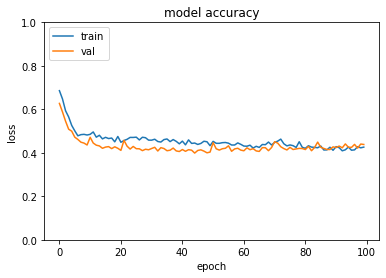

In [11]:
history = autonn.history_list[0]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

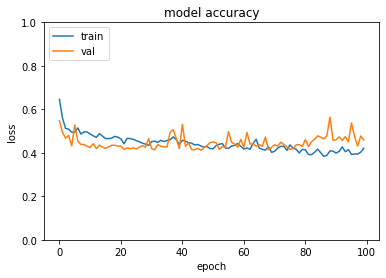

In [12]:
history = autonn.history_list[1]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

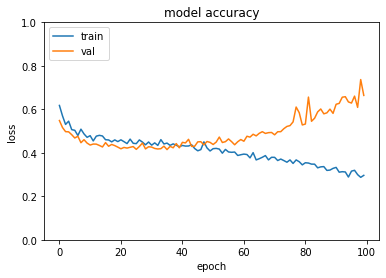

In [13]:
history = autonn.history_list[2]
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'val'], loc='upper left')
plt.show()